## 读取MNIST数据
- http://yann.lecun.com/exdb/mnist/

In [161]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### 检视数据

In [162]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [163]:
type(mnist.train.images)

numpy.ndarray

In [165]:
#mnist.train.images

In [166]:
mnist.train.images.shape

(55000, 784)

In [167]:
mnist.test.images.shape

(10000, 784)

In [168]:
#mnist.train.images[0]
mnist.train.images[2].shape

(784,)

In [135]:
#mnist.train.images[2]

In [169]:
sample_image = mnist.train.images[2].reshape(28,28)

Populating the interactive namespace from numpy and matplotlib


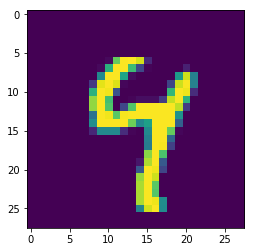

In [170]:
%pylab inline
import matplotlib.pyplot as plt

plt.imshow(sample_image)

## 设定网络参数

In [171]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [172]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

###  定义Placeholder (占位符)

In [173]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建构多层神经网络


In [174]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 设定权重与偏倚

In [175]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [176]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [177]:
pred = multilayer_perceptron(x, weights, biases)

### 设定代价函数

In [178]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化所有变量

In [179]:
init = tf.global_variables_initializer()

# 训练模型

### 取得一批数据

In [180]:
Xsamp,ysamp = mnist.train.next_batch(1)

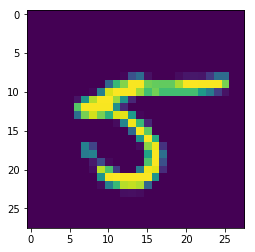

In [181]:
plt.imshow(Xsamp.reshape(28,28))

In [182]:
print(ysamp)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## 執行會話

In [183]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost=149.0347692871093
Epoch: 2 cost=55.725515270233146
Epoch: 3 cost=41.346624228737554
Epoch: 4 cost=33.836020915291535
Epoch: 5 cost=28.80933612021533
Epoch: 6 cost=25.16324094945735
Epoch: 7 cost=22.291908839399156
Epoch: 8 cost=20.07481621633876
Epoch: 9 cost=18.315356909903606
Epoch: 10 cost=16.680906753756787
Epoch: 11 cost=15.486594807668173
Epoch: 12 cost=14.338668670109984
Epoch: 13 cost=13.41222490885041
Epoch: 14 cost=12.566970844919013
Epoch: 15 cost=11.812148888923911
Training Completed in 15 Epochs


## 评估模型

In [184]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [185]:
correct_predictions[0]

<tf.Tensor 'strided_slice_14:0' shape=() dtype=bool>

In [186]:
correct_predictions = tf.cast(correct_predictions, "float")

In [187]:
correct_predictions[0]

<tf.Tensor 'strided_slice_15:0' shape=() dtype=float32>

In [188]:
accuracy = tf.reduce_mean(correct_predictions)

In [189]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [190]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [191]:
mnist.test.images.shape

(10000, 784)

In [192]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9074
